<a href="https://colab.research.google.com/github/pysr1/Randas-/blob/master/agging_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

channel = np.random.choice(['Direct', 'Email', 'Mobile'], p = [0.6, 0.25, 0.15], size = 100000)
revenue = np.random.normal(1000, 10, 100000) 
purchases = np.random.poisson(10, 100000)
visits = np.random.poisson(30, 100000)


df = pd.DataFrame({'channel': channel, 'revenue': revenue, 'purchases' : purchases, 'visits': visits})
df.head()

,channel,revenue,purchases,visits
0,Direct,1002.732425,11,28
1,Direct,996.154696,12,39
2,Email,988.806600,6,44
3,Direct,1022.473677,5,31
4,Direct,999.057161,7,22


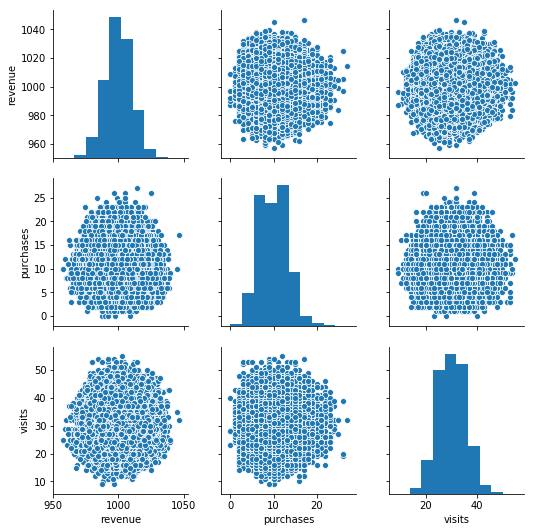

In [0]:
sns.pairplot(df)
plt.show()

In [0]:
pd.DataFrame(df.groupby('channel').size()).rename(columns = {0 : 'Count'}).style.background_gradient()

,Count
channel,
Direct,60232
Email,24890
Mobile,14878


In [0]:
# different agg for each column
aggregations = {
    'revenue':'mean',
    'purchases': np.median
}
df.groupby('channel').agg(aggregations).rename(columns={'revenue': 'average revenue', 'purchases' : 'median purchases'})

,average revenue,median purchases
channel,,
Direct,1000.001890,10
Email,1000.061684,10
Mobile,1000.060457,10


figure out how to make this cleaner:

In [0]:
df.groupby(
    ['channel']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'revenue': [min, max, sum],
        # find the number of network type entries
        'purchases': ["count"],
        # minimum, first, and number of unique dates
        'visits': [min, 'first', 'nunique']
    }
).style.background_gradient()

In [0]:
# supported in newer verisons of pandas:
df.groupby('channel').agg(
    # Get max of the duration column for each group
    max_revenue=('revenue', max),
    # Get min of the duration column for each group
    min_revenue=('revenue', min)#,
    # Get sum of the duration column for each group
    #total_purchases=('purchases', sum) #,
    # Apply a lambda to date column
    #log_visits_mean=("visits", lambda x: (np.mean(np.log1p(x))   
)

TypeError: ignored

In [0]:
df.groupby('channel')['revenue'].agg([('mean_rev','mean'), ('std_rev','std')])

,mean_rev,std_rev
channel,,
Direct,1000.018525,10.016454
Email,999.919971,10.022288
Mobile,999.947871,9.970560


In [0]:
# multiple aggs on the same column

grouped = df.groupby('channel').agg({"revenue": [min, max, np.mean]})
grouped.columns = grouped.columns.droplevel(level=0)
grouped = grouped.rename(columns={
    "min": "min_rev", "max": "max_rev", "mean": "mean_rev"
})
grouped.head()

,min_rev,max_rev,mean_rev
channel,,,
Direct,959.404445,1046.606509,1000.018525
Email,960.985876,1038.421480,999.919971
Mobile,957.240118,1034.888524,999.947871
